# Ajustes de calibración. Modelos paramétricos no lineales

En ocasiones para caracterizar el funcionamiento de nuestro sistema tenemos que utilizar un modelo paramétrico con dependencias no lineales.

Volvamos al último ejemplo que utilizamos en el tutorial sobre [modelos paramétricos lineales](CalibracionModelosParametricosLineales.ipynb). Supongamos que queremos caracterizar un proceso de atenuación exponencial

\begin{equation}
    L(x) = a\, e^{-\mu\, x}. 
\end{equation}

del que hemos obtenido varias medidas $L$ para distintos espesores $x$.

Conocemos la física del proceso descrita por el modelo dado en la ecuación anterior. Nuestro objetivo es a partir de las medidas $\{x, L\}$ obtener los parámetros $[a, \mu]$

Para resolver este problema podemos utilizar la función `curve_fit` del submódulo `optimize` del módulo `scipy`

In [1]:
from scipy.optimize import curve_fit
# e importamos también otros módulos que nos hacen falta en este cuaderno
import numpy as np
import matplotlib.pyplot as plt

Generamos nuestras medidas inlcuida de nuevo una incertidumbre dada en este caso del 2%.

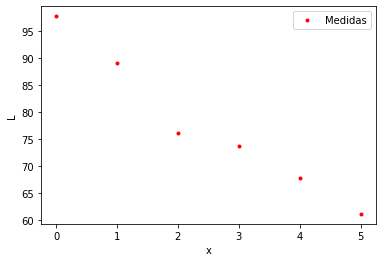

In [2]:
# Parámetros de la fucnión real
a = 100
mu = 0.1
# Incertidumbre relativa
sigma_uncertainty = 0.02
# Incertidumbre de cada medida
rel_uncs = np.random.normal(1, sigma_uncertainty, 6)
# Espesores en los que medimos la atenuación
xs = np.array([0, 1, 2, 3, 4, 5])
# Atenuaciones medidas
Ls = a * np.exp(-mu*xs) * rel_uncs
# Representación gráfica
fig, ax = plt.subplots()
ax.plot(xs, Ls, 'r.', label='Medidas')
ax.set_xlabel('x')
ax.set_ylabel('L')
ax.legend()
plt.show()

Para poder realizar este tipo de ajuste mediatne `curve_fit` necesitamos una función que describa el modelo

In [3]:
def modf(x, a, mu):
    return a * np.exp(-mu*x)

De acuerdo a la documentación de [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) podemos llamar a la función de la forma más minimalista pasando simplemente la función del modelo, las variables independientes y las variables dependientes (las medidas). `curve_fit`nos devolverá los parámetros de ajuste y su matriz de covarianza.

La información que podemos obtener de la matriz de covarianza depende de la interpretación del modelo y de si hemos proporcionado a `curve_fit` estimaciones de las incertidumbres de nuestras medidas

In [4]:
ps, mcov = curve_fit(modf, xs, Ls)

/var/folders/pr/rn87k1_x1t5fggdh6ng8zyxw0000gn/T/ipykernel_20606/2908929205.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-mu*x)


Como muchos otros problemas no lineales es posible que curve_fit diverja. En ocasiones es necesario introducir una estimación razonable de los parámetros iniciales. 

In [5]:
ps, mcov = curve_fit(modf, xs, Ls, [98, 0.11])

Los parámetros ajustados

In [6]:
ps

array([9.67249818e+01, 9.30268027e-02])

La matriz de covarianzas

In [ ]:
mcov

array([[3.11108792e+00, 9.57323742e-03],
       [9.57323742e-03, 5.02763841e-05]])

Las elementos de la diagonal nos dan las varianzas de los parámetros, que podemos entender como el cuadrado de la incertidumbre en su estimación 

In [8]:
[np.sqrt(mcov)[i, i] for i in range(2)]

[1.7638276346973614, 0.00709058418389589]

Representamos los datos medidos y sus ajustes

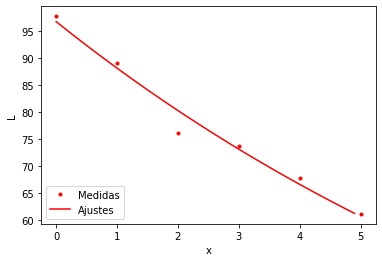

In [10]:
xg = np.arange(xs.min(),xs.max(),0.1)
fig, ax = plt.subplots()
ax.plot(xs, Ls, 'r.', label='Medidas')
ax.plot(xg, modf(xg, *ps), 'r-', label='Ajustes')
ax.set_xlabel('x')
ax.set_ylabel('L')
ax.legend(loc='lower left')
plt.show()

En este caso el modelo físico introduce información implicita, las medidas se tratan simultáneamente aunque no se hayan realizado en las mismas condiciones.